# ch3-summary

## 3.1. 신경망의 구조

- 네트워크, 층, 모델..?  
  네트워크 == 신경망 == 모델 (딥러닝 구성 자체를 말하는듯함)  
  층  == 딥러닝의 구성 단위 (입력과 출력을 처리하는~)  
  모델 == 층의 네트워크 (각 레이어가 입출력을 전달하고받도록 구성된~)  
  
- 층은 딥러닝의 레고블록처럼~  

- 층호환성..?  
  각 층이 특정 크기의 입력텐서만 받고~ 특정 크기의 출력텐서만 반환하는 성질~  
  
- 비순환유향그래프..?  
  방향그래프긴 한데 자기에게 못돌아오는 그래프~  
  대부분의 모델은 비순환유향그래프임  

- 가설공간..?  
  네트워크 구조를 선택한다는 것은  
  가능성 있는 공간을 입력데이터에서 출력데이터로 매피아는 일련의 특정 텐서 연산..?  
  딱 맞는 네트워크 구조를 찾는것은 힘든일임  
  경험적으로 적절한 모델을 찾는것이 ~  
  
- 손실함수..?  
  훈련하는동안  
  0에 가까워질수록 예측과 실제값이 유사하다는 의미
  
- 옵티마이저..?  
  손실함수를 기반으로 네트워크를 가중치를 업데이트  
  특정종류의 확률적경사하강법을 구현  

- 여러개의 출력을 내는 신경망은 여러개의 손실함수를 가질수있음 (출력당 하나씩)  

- 목적함수(손실함수) 를 선택하는 방법..?  
  목표하는 문제 해결에 따라 적절하게 선택해야함  
  완전히 새로운 연구를 할때만 독자적인 목적함수를 만들게됨  


---
## 3.2. 케라스 소개

- 딥러닝 모델을 간편하게 다룰수있도록 지원하는 파이썬 기반 프레임워크  
  서비스를 빠르게 만들기위해 개발된~ 연구자들을위해~  
  대부분의 딥러닝 모델에 적합  
  
- 케라스 백엔드엔진  
  텐서플로, 씨아노, CNTK  
  
- 케라스로 MNIST 예제 구동  
  입력텐서와 타깃센서로 이루어진 훈련데이터 정의  
  입력과 타깃으패핑하는 네트워크 정의  
  
- 모델을 정의하는 방법..?  
  시퀀스 API, 함수형 API  


---
## 3.3. 딥러닝 컴퓨터세팅

- GPU가 더좋다~ 클라우드가 더좋다~

- 깃헙~ 예제코드~



---
## 3.4. 영화 리뷰 분류 : 이진 분류 예제

- 영화에 대한 긍정/부정 리뷰 분류
  IMDB 데이터세트

- 훈련데이터와 테스트데이터를 나누는 이유..?
  트레이닝데이터로 테스트를하면 오버피팅이 발생하기 때문!!
  (하나의 데이터세트를 쪼개서 사용하는 경우..? 보통 0.8/0.2 로 구분하는경우..?)

- IMDB 데이터세트 속성 설명

- 케라스에서 IMDB 데이터세트 살펴보기
  데이터세트의 길이, 크기
  리뷰 텍스트에서 사용되는 단어는 10000개로 제한 (인덱스 99999)
  리뷰 텍스트를 사전에 등록되어있는 단어의 인덱스번호로 매칭해놓았음
  => 실제 텍스트를 확인할때 사전과 매핑해야~?
  => 원-핫 인코딩..? 왜 쓰는가?? (데이터 레이블..?) (1의 개수로 판단하는..?) (트레이드오프..?)

- 신경망 모델 만들기
  1) 신경망 생성 : Dense 층 추가 + relu 활성함수 지정 + 시그모이드 활성함수 지정
  2) 컴파일 : rmsprop 옵티마이저 지정 + binary_crossentropy 로스함수 지정 + accuracy 메트릭스 지정
  3) 테스트 : 훈련데이터와 테스트데이터 지정 + 에포크사이즈 지정 + 배치사이즈 지정 + 
     (fit 함수 결과를 히스토리로 받아서 확인할수있음) 
  4) 평가 : 테스트 결과를 matplotlib 로 시각화 확인
     (예측값과 실제값에대한 loss, accu, 확인) 

- 오버피팅 문제 해결

- early stopping..? => 모델 학습/컴파일 테스트 과정에서 프로그램 레벨에서 오버피팅 판단~ (사람이 직접하는게아님)

- 훈련된 모델로 예측 실행
  predict 함수~



### (코드 실습)

In [1]:
## IMDB 데이터세트 로드

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
## 정수 시퀀스를 이진행렬로 인코딩

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train)
print(x_test)
print(x_train[0])

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
[0. 1. 1. ... 0. 0. 0.]


In [3]:
## 레이블을 벡터로 변환

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train)
print(y_test)

[1. 0. 0. ... 0. 1. 0.]
[0. 1. 1. ... 0. 0. 0.]


In [4]:
## 모델 정의

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
## 모델 컴파일

model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [6]:
## 옵티마이저 설정하기

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [7]:
## 손실과 측정을 함수 객체로 설정

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy])

In [8]:
## 검증 세트 준비

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
## 모델 훈련

model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])

history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.5056 - acc: 0.7869 - val_loss: 0.3778 - val_acc: 0.8714
Epoch 2/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.2995 - acc: 0.9044 - val_loss: 0.3003 - val_acc: 0.8895
Epoch 3/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.2174 - acc: 0.9290 - val_loss: 0.3089 - val_acc: 0.8710
Epoch 4/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1748 - acc: 0.9442 - val_loss: 0.2829 - val_acc: 0.8846
Epoch 5/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1422 - acc: 0.9544 - val_loss: 0.2855 - val_acc: 0.8859
Epoch 6/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1149 - acc: 0.9652 - val_loss: 0.3133 - val_acc: 0.8788
Epoch 7/20
15000/15000 [==============================] - 2s 115us/step - 

In [16]:
print(history.history)

{'val_loss': [0.3777605456352234, 0.30032042841911316, 0.3089017548084259, 0.28294081444740293, 0.2854898992538452, 0.3133087540626526, 0.3132726318359375, 0.38627751240730285, 0.36397034001350403, 0.38471435050964353, 0.41507122797966, 0.45352791152000427, 0.47087361006736755, 0.5050847821712494, 0.5323456324577331, 0.5701003874778747, 0.6018693321228027, 0.6317513502120972, 0.7289528594017028, 0.695660378074646], 'val_acc': [0.8713999997138977, 0.8895000004768372, 0.8710000000953674, 0.8846000002861023, 0.8859000002861023, 0.8787999999046325, 0.8837999999046325, 0.8655999999046325, 0.8781000000953675, 0.8788000001907349, 0.8773, 0.8689999998092651, 0.8729999997138977, 0.8720999996185302, 0.8701999998092651, 0.8694999996185303, 0.8667999997138977, 0.8668999995231629, 0.855599999332428, 0.8654999994277954], 'loss': [0.5055805632432302, 0.29948044962882997, 0.21743362159729004, 0.17483400015830994, 0.14221941572825114, 0.11487679263750712, 0.0977293883005778, 0.080570490082105, 0.066058

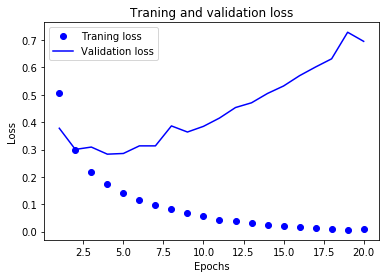

In [18]:
## 훈련과 검증 손실 표출

import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Traning loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

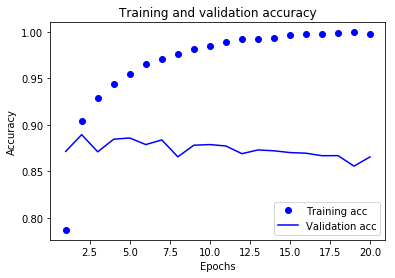

In [19]:
## 훈련과 검증 정확도 표출

plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [25]:
## 모델을 처음부터 다시 훈련

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 89us/step - loss: 0.4782 - acc: 0.8270
Epoch 2/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.2785 - acc: 0.9075
Epoch 3/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.2093 - acc: 0.9278
Epoch 4/4
25000/25000 [==============================] - 2s 67us/step


In [28]:
## 다시 훈련한 모델 평가

print(results)

[0.30524370700836184, 0.87852]


In [30]:
## 훈련된 모델로 새로운 데이터에 대해 예측

model.predict(x_test)

array([[0.1573557 ],
       [0.99993837],
       [0.77464175],
       ...,
       [0.11122066],
       [0.05827653],
       [0.41708115]], dtype=float32)

### (코드 실습 정리)

- 원본 데이터를 텐서로 주입하기위해 꽤 많은 전처리작업이 필요함  
  실습코드처럼 단어 시퀀스는 이진벡터(원-핫 인코딩) 로 인코딩될수도있고, 다른 방식으로 인코딩될수도 있음

- relu 활성화함수..?  
  => (x > 0)? x : 0 
  
- Dense 층..?  
  => 완전히 연결되어있는 신경망 층
  => fully connected layer == densely connected layer == dense layer

- relu 활성화함수와 Dense 레이어로 구성된 네트워크(모델)은  
  감성 분류와 같은 여러종류의 문제에 적용할수 있으므로 앞으로 자주 사용하게 됨

- 이진 분류 문제에서 네트워크는, 하나의 유닛과 sigmoid 활성화함수를 가진 Dense 층으로 끝나야 함  
  => 네트워크의 목적이 "이진 분류" 이기때문에, 최종 출력이 0 또는 1 인 스칼라값이 됨  
  => 즉 출력 클래스가 두개인 출력값 하나를 반환하기 때문에,  
     "하나의 유닛" 과 "sigmoid 활성화함수" 로 구성된 Dense 층으로 끝나야함

- 이진 분류의 결과값인 sigmoid 출력값에 대해 사용할 손실함수는 binary_crossentropy 임 (이유는?)

- rmsprop 옵티마이저는 문제 종류에 상관없이 일반적으로 좋은 선택임 (다른옵티마아저와의 차이는?)

- 훈련데이터에 대해 성능이 향상됨에 따라 신경망은 과대적합되기 시작하고,  
  이전에 본적없는 데이터에 대해서는 결과가 점점 나빠지기 시작함  
  => 항상 테스트는 훈련데이터 이외의 데이터에서 진행해야함


---
## 3.5. 뉴스 기사 분류 : 다중 분류 문제

- 다중분류..?  
  이전 단일분류는 긍정/부정 딱 두가지만 판단하는 경우 => 즉 결과값이 두 종류 (ex. 참/거짓, 긍정/부정, ..)  
  다중분류는 최종 판단 종류가 여러개인 경우 (ex.뉴스기사카테고리, ..)  
  
- 로이터 데이터세트 살펴보기

- 모델구성  

- 입력층은 출력층보다 크기가 커야한다..?  
  => Dense 층은 이전층의 출력에서 제공한 결과값을 입력으로 사용함  
  => 그런데 한 층에서 분류에 필요한 일부정보가 누락되면 그 다음층 이후부터는 이를 복원할 방법이 없음  
  => 이런 모델구조는 잠재적으로 정보의 병목(information bottleneck) 이 될수있음  

- 정보의 병목..?  
  => 데이터 입장에서 데이터가 유실되는것을 병목이라고 부름!    

- softmax 활성화함수..?  
  => 입력에 대한 분류 결과를 확률분포로 반환하는 함수  
  => ex) 이 값은 이 카테고리일 확률이 0.86 정도임  
  
- 훈련검증  

- 충분히 큰 중간층(은닉층) 을 두어야 하는 이유..?  
  => 정보의 병목을 방지하기 위해서!!  

- 병목현상 예시 : Dense(64) -> Dense(4) -> Dense(46) 로 구성된 네트워크  
  => 입력이 4차원 중간층을 통과하면서 필요한 정보 대부분이 유실됨  
  => 필요한 정보를 4차원 표현안에 구겨넣었지만 전부 넣지는 못했기 때문  


### (코드 실습)

### (코드 실습 정리)

- N 개의 클래스로 분류하는 문제에 대한 모델의 마지막 Dense 층 크기는 N 이어야 함  
  => N 개의 클래스로 분류한다는 말은, 분류하고자하는 종류(카테고리)가 N 개라는 의미  
  => 즉 네트워크의 결과값의 종류가 N 개여야 한다는 의미  
  => 다시말해서 마지막 Dense 층의 출력 갯수가 N 개여야 한다는 의미  
  
- 단일 레이블, 다중 분류 문제에서는 N개의 클래스에 대한 확률분포를 출력하기 위해 softmax 활성화함수를 사용해야함  

- 클래스란..?  
  => 분류문제에서 선택할수있는 가능한 레이블의 집합  
  => ex) 고양이와 강아지 사진을 분류할때, 클래스는 고양이or강아지 두 개가 됨  
  => { x | x 는 "고양이" or "강아지" }  
  
- 레이블이란..?  
  => 분류문제에서 클래스 할당의 구체적인 사례  
  => ex) 29번 사진에 "강아지" 클래스가 들어있다고 표시한다면, "강아지" 는 32번사진의 "레이블" 이 됨  
  
- 다중 분류 문제에서는 항상 범주형 crossentropy 를 사용해야함  
  => 이 함수는 모델이 출력한 확률분포와 타깃분포 사이의 거리를 최소화함 (무슨의민지 잘 모르겠음)  

- 다중 분류에서 레이블을 다루는 두가지 방법
  1) 범주형인코딩/원핫인코딩 으로 인코딩하고 categorical_crossentropy 손실함수를 사용함
  2) 레이블을 정수로 인코딩하고 sparse_catecorical_crossentropy 손실함수를 사용함

- 많은 수의 범주를 분류할때 중간층의 크기가 너무 작아 네트워크에 정보병몪이 생기지않도록 주의해야함


---
## 막간 잡담


- 공부하는거랑 발표하는거랑 확실히 느낌이 다른것같은데, 다들 발표준비 어떻게 했는지..?  
  노태환 : 너무 잘 설명하려고 하지말고~ 구성원들에게 화두를 던지는쪽으로~  
  김용한 : 먼저 한번 읽어보고~ 발표하는걸 시뮬레이션~  

- 발표준비할때 pdf 자료 + 어도비아크로뱃 활용~!!  
  형광펜기능! 코멘트기능!  


---
## 3.6. 주택 가격 예측 : 회귀 문제

- 회귀..?  
  => 분류문제는 입력에 대한 개별적인 레이블 하나를 예측하는 것이 목적임  
  => 회귀문제에서는 개별적인 레이블 대신에 연속적인 값을 예측하는 방식임  
  => ex) 기상데이터가 주어졌을때, 내일의 기온을 예측  
  => ex) 소프트웨어 명세가 주어졌을때, 소프트웨어 프로젝트가 완료될 시간을 예측  
  
- "회귀" 와 "로지스틱 회귀"..?  
  로지스틱 회귀는 분류알고리즘임. (회귀 알고리즘이 아님)  

- 보스턴 데이터세트 살펴보기  
  (보스턴 외곽 지역의 범죄율, 지방세율 등이 주택가격에 어떤 영향을 주는지)  

- 스케일이 다르다는 말..?  
  0,1 스케일과 0~100% 스케일이 다르다는 말!!  
  => ex) 어떤값은 0과 1사이의 비율을 나타내고, 어떤것은 1과 12 사이의 값을 가짐  
  
- 모델 작성  
  목표가 주택가격예측 이므로 스칼라값을 반환하도록 하기위해 맨마지막 층은 1개로  
  평균제곱오차 활성함수..? (평균절대오차..?)

- 평균제곱오차 손실함수 (mse, mean squared error)  
  => 예측과 타깃 사이 거리의 제곱  
  
- 평균절대오차 활성화함수 (mae, mean absolute error)  
  => 예측과 타깃 사이 거리의 절대값  
  => ex) MAE가 0.5 면 예측이 평균적으로 500달러(1.0 == 1000달러) 정도 차이난다는 의미임  
  
- K-겹 교차 검증(K-fold cross-validation) 이란..?  
  => 보통 데이터세트를 8:2 로 분리해서 트레이닝과 테스트에 사용함  
  => K-겹 교차검증에서는, 데이터세트를 K개로 분할하고,  
     K 개의 모델을 각각 만들어서 K-1개의 분할에서 훈련하고,  
     나머지 1개 분할에서 평가하는 방법임  
  => 모델의 검증점수는 K 개의 검증점수의 평균으로 사용함  
  => 데이터 포인트가 많지 않을때 사용하는 검증방법임  
  
- 지수 이동 평균(exponential moving average) 란..?  
  => 시계열 데이터를 부드럽게 만드는 기법  


### (코드 실습)

### (코드 실습 정리)

- 회귀문제는 분류문제에서와는 다른 손실함수를 사용함  
  => 평균제곱오차(MSE) 는 회귀에서 자주 사용되는 손실함수임  

- 평가지표 역시 분류문제와 다른 지표를 사용함  
  => 일반적으로 평균절대오차(MAE) 를 평가지표로 사용함  

- 입력데이터의 특성이 서로 다른 범위를 가지면,  
  전처리단계에서 각 특성의 스케일을 개별적으로 조정해야함  

- 가용 데이터가 적을때는, K겹 교차 검증을 활용하여 모델 평가 신뢰도를 올릴수있음

- 가용 훈련데이터가 적을때는, 과대적합을 피하기위해 은닉층의 수를 줄인 모델이 좋음  
  => 데이터가 적다는 말은, 그 트레이닝 데이터 자체에 모델이 적합해질수 있기때문임  
  => 트레이닝 데이터의 특성이 모델에 너무 많이 반영되지 않도록 의도적으로 층을 줄여주는것임
  => 데이터세트에 특성이 명확하게 구분되면 은닉층을 얇게!! (유한값)
  => 특성이 거의 없는성질이면(이미지) 은닉층을 많이해야!! (무한값)


---
## 3.7. 챕터 정리

- 벡터 데이터를 통해서 이진분류, 다중분류, 스칼라회귀 와 같은 일반적인 머신러닝 작업을 다룰수 있음

- 일반적으로 원본데이터를 신경망에 주입하기 전에 전처리작업이 필요함

- 데이터에 범위가 다른 특성이 있다면, 전처리단계에서 각 특성을 독립적으로 스케일 조정해야 함 ~~(독립적인 속성으로 분리해라는 말인듯)~~

- 훈련이 진행됨에 따라 신경망의 과대적합(over-fitting) 이 시작되고, 새로운 데이터에 대해 나쁜 결과가 도출되게 됨

- 훈련데이터가 많이 않으면, 1~2개의 은닉층을 신경망에 추가하는것으로 과대적합을 피할수있음

- 데이터가 많은 범주로 나뉘어 있을때, 중간층이 너무 작으면 정보의 병목이 생길수 있음 ~~(범주별 연산때문에 병목이 발생한다는 말인듯) (범주를 구분하는 중간층을 추가하면 해결할수있는것으로 보임)~~

- 회귀문제는 분류문제와는 전혀 다른 손실함수와 평가지표를 사용함

- 적은 데이터를 사용할때는, "K-겹 검증" 이 신뢰할수있는 모델 평가를 도와줌 ~~(무슨말인지 모르겠음)~~


---
## (오브더레코드)

- 회귀..? 분류..?  
  => 분류 와는 다른의미임  
  => 분류 는 이러이러한것들인 이 카테고리로 구분된다 와 같은 판단을 확률값으로 계산하는~  
  => 최종 결과값이 확률..?  
  
- 그렇다면 회귀는 무엇인가?  
  => 회귀는 이러이러한 추세를 봤을때 이 다음은 이러이러할것이다 라는것을 계산하는~  
  => 다음 값을 예측하는것이기때문에 보통 스칼라값이 나옴  
  => 최종 결과 값이 스칼라..?  

- plot 을 보면서 오버피팅 찾는 방법..?  
  => loss 값이 최소인 부분을 찾아서 에포크를 찾고, 그 에포크 값으로 모델을 재학습시킴  
  => 보통 이차함수 형태로 나타나는 loss 함수에서 loss값이 0으로 수렴하다가 다시 상승하는 현상이 나타남  
  => loss 값이 0 으로 수렴하도록 하는것이 모델의 목표이기 때문에   
  => 즉 최소값이 (미분계수가 0이되는 시점)  

- 2명이 준비하는 방식에서 발표를 어떻게..?  
  => 한명은 이론 한명은 코드를 담당하는 방식  
  => 범위를 정해서 각자 담당하는 방식  
  => 한명은 전체 개괄을 준비하고, 한명은 디테일한 내용을 준비하는 방식  
  => 각자 자기가 공부한 부분을 공유하면서 피드백 (나는 이렇이렇게 이해를 했다~ 나는 저러저렇게도 보인다)  
  => 준비하는 사람들끼리 직접 연락보다는, 전체카톡방에서 의견 나누는게 좀더 편할듯함  
  
- 질문목록 정리  
  => 각자 쓰기권한 참여~  

